In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv(r'C:\Users\vvagh\OneDrive - Indian Institute of Science Education and Research Bhopal\Documents\IITM Stuff\programming\project work\project 1\project data\project1-data_kerela_cleaned.csv')
df.isna().sum()

YEAR         0
AC           0
CANDIDATE    0
SEX          0
PARTY        0
VOTES        1
dtype: int64

In [4]:
df.dropna(inplace=True,ignore_index=True)
df.isna().sum()

YEAR         0
AC           0
CANDIDATE    0
SEX          0
PARTY        0
VOTES        0
dtype: int64

In [5]:
df

,YEAR,AC,CANDIDATE,SEX,PARTY,VOTES
0,1957,PARASSALA,KUNJUKRISHNAN NADAR M.,M,INC,16742.0
1,1957,PARASSALA,KRISHNA PILLAI K.,M,PSP,8338.0
2,1957,PARASSALA,STUART.,M,IND,5831.0
3,1957,PARASSALA,RETNASWAMY N.,M,CPI,5816.0
4,1957,PARASSALA,KUNJU MOOSA KUNJU I.,M,IND,4466.0
...,...,...,...,...,...,...
9742,2021,THODUPUZHA,PROF. K I ANTONY,M,KEC,47236.0
9743,2021,THODUPUZHA,SHYAMRAJ P,M,BJP,21263.0
9744,2021,THODUPUZHA,LEETHESH P T,M,BSP,934.0
9745,2021,THODUPUZHA,NOTA,NOTA,NOTA,674.0


In [12]:
len(df['YEAR'].unique())

16

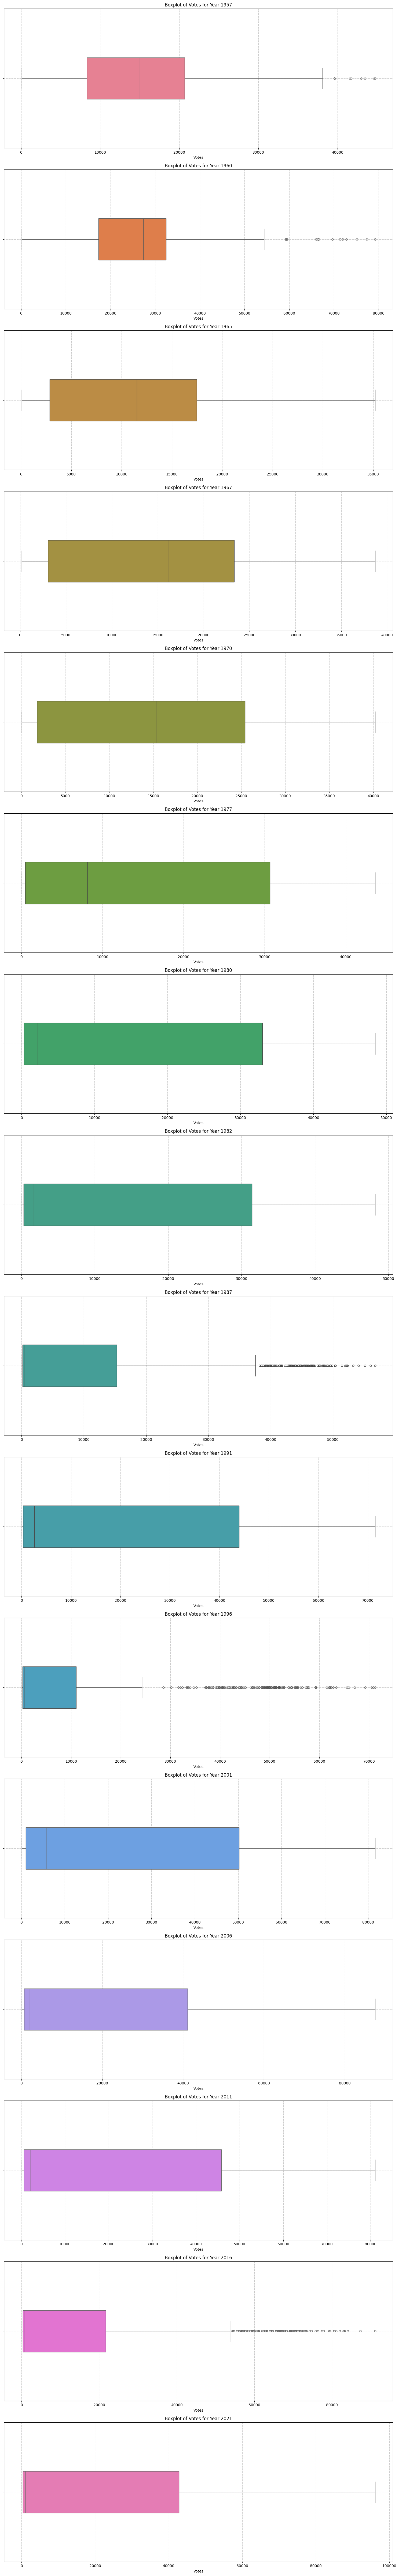

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotting_outliers(df):
    unique_years = df['YEAR'].unique()
    num_years = len(unique_years)
    
    # Define a color palette
    palette = sns.color_palette("husl", num_years)
    
    # Create a large figure
    plt.figure(figsize=(15, 6 * num_years))
    
    for idx, year in enumerate(unique_years):
        df_year = df[df['YEAR'] == year].dropna(subset=['VOTES'])
        if df_year.empty:
            continue
        
        # Calculate IQR and limits
        iqr = df_year['VOTES'].quantile(0.75) - df_year['VOTES'].quantile(0.25)
        lower_limit = df_year['VOTES'].quantile(0.25) - 1.5 * iqr
        upper_limit = df_year['VOTES'].quantile(0.75) + 1.5 * iqr
        
        # Plot
        plt.subplot(num_years, 1, idx + 1)
        sns.boxplot(x=df_year['VOTES'], color=palette[idx],
                    flierprops=dict(marker='o', color='red', markersize=5),
                    width=0.3)  # Adjust the width of the boxplots
        plt.title(f'Boxplot of Votes for Year {year}')
        plt.xlabel('Votes')
        plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines for better readability

    plt.tight_layout()
    plt.show()

# Example usage with your DataFrame
plotting_outliers(df)
